In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

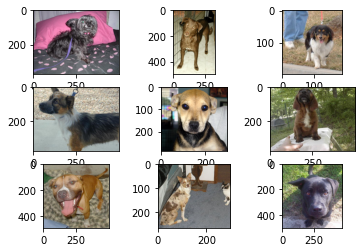

In [2]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'C:/Users/tanma/OneDrive/Desktop/Deep Learning/kagglecatsanddogs_3367a/PetImages/Dog/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330+1+i)
	# define filename
	filename = folder + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

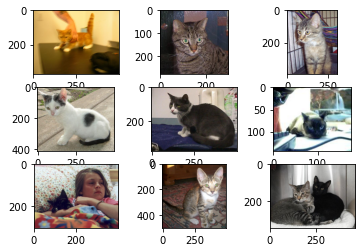

In [3]:

# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'C:/Users/tanma/OneDrive/Desktop/Deep Learning/kagglecatsanddogs_3367a/PetImages/Cat/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [6]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [7]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.25)


In [8]:
d="C://Users//tanma//OneDrive//Desktop//Deep Learning//kagglecatsanddogs_3367a//PetImages"
os.listdir(d)

['Cat', 'Dog']

In [9]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [10]:
train_data_gen = image_generator.flow_from_directory(directory=str(d),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     subset='training',class_mode='categorical'
                                                     )

Found 18750 images belonging to 2 classes.


In [11]:
validation_data_gen =image_generator.flow_from_directory(directory=str(d),
                                                     batch_size=10,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   subset='validation',class_mode='categorical'
                                                     )

Found 6250 images belonging to 2 classes.


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

In [14]:

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.0001)
callbacks = [earlystop,learning_rate_reduction]

In [40]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

NameError: name 'df' is not defined

In [45]:

epochs=10
history = model.fit_generator(
    train_data_gen, 
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=50,
    steps_per_epoch=150,
    callbacks=callbacks
)

Epoch 1/10
 31/150 [=====>........................] - ETA: 7:25 - loss: 0.8034 - accuracy: 0.5968

UnknownError:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000019B013B2D60>
Traceback (most recent call last):

  File "C:\Users\tanma\Anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 249, in __call__
    ret = func(*args)

  File "C:\Users\tanma\Anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\tanma\Anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 892, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\tanma\Anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 822, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\tanma\Anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 948, in generator_fn
    yield x[i]

  File "C:\Users\tanma\Anaconda3\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\tanma\Anaconda3\lib\site-packages\keras_preprocessing\image\iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "C:\Users\tanma\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py", line 114, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "C:\Users\tanma\Anaconda3\lib\site-packages\PIL\Image.py", line 2943, in open
    raise UnidentifiedImageError(

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000019B013B2D60>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1608]

Function call stack:
train_function


In [16]:
history=model.fit(
            train_data_gen,
            steps_per_epoch=8,
            epochs=10,
            validation_data=validation_data_gen,
            validation_steps=8,verbose=2,
            callbacks=callbacks
            
)

Epoch 1/10
8/8 - 43s - loss: 1.2936 - accuracy: 0.5508 - val_loss: 1.0199 - val_accuracy: 0.5750
Epoch 2/10
8/8 - 40s - loss: 1.0609 - accuracy: 0.5781 - val_loss: 1.8842 - val_accuracy: 0.4625
Epoch 3/10
8/8 - 40s - loss: 1.0733 - accuracy: 0.5664 - val_loss: 3.8125 - val_accuracy: 0.4750
Epoch 4/10
8/8 - 41s - loss: 1.0548 - accuracy: 0.5938 - val_loss: 5.3222 - val_accuracy: 0.4000
Epoch 5/10
8/8 - 49s - loss: 1.1130 - accuracy: 0.5195 - val_loss: 1.2873 - val_accuracy: 0.4750
Epoch 6/10
8/8 - 44s - loss: 1.1896 - accuracy: 0.5977 - val_loss: 4.2571 - val_accuracy: 0.5000
Epoch 7/10
8/8 - 41s - loss: 0.9533 - accuracy: 0.6172 - val_loss: 2.9632 - val_accuracy: 0.4875
Epoch 8/10
8/8 - 43s - loss: 0.8327 - accuracy: 0.5898 - val_loss: 2.9934 - val_accuracy: 0.5750
Epoch 9/10
8/8 - 40s - loss: 1.0647 - accuracy: 0.5898 - val_loss: 7.5129 - val_accuracy: 0.4750
Epoch 10/10
8/8 - 42s - loss: 0.9668 - accuracy: 0.5820 - val_loss: 0.7558 - val_accuracy: 0.5125


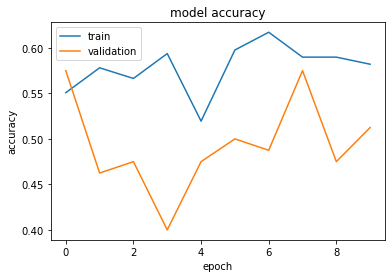

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

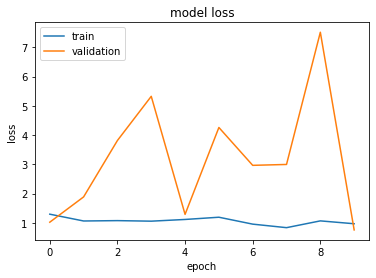

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [22]:
local_weights_file = 'inception_v3_weights.h5'
print(type(local_weights_file))
print(" ")
print(local_weights_file)

<class 'str'>
 
inception_v3_weights.h5


In [20]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

NameError: name 'InceptionV3' is not defined

# inception

In [5]:
# Define our example directories and files
base_dir = "C:\\Users\\tanma\\OneDrive\\Desktop\\Deep Learning\\cats_and_dogs_filtered\\cats_and_dogs_filtered"
#
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
#
print("train_dir path is : ", train_dir)
print(" ")
print("validation_dir path is : ", validation_dir)

train_dir path is :  C:\Users\tanma\OneDrive\Desktop\Deep Learning\cats_and_dogs_filtered\cats_and_dogs_filtered\train
 
validation_dir path is :  C:\Users\tanma\OneDrive\Desktop\Deep Learning\cats_and_dogs_filtered\cats_and_dogs_filtered\validation


In [6]:
train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
#
print("train_cats_dir path is : ", train_cats_dir)
print(" ")
print("train_dogs_dir path is : ", train_dogs_dir)

train_cats_dir path is :  C:\Users\tanma\OneDrive\Desktop\Deep Learning\cats_and_dogs_filtered\cats_and_dogs_filtered\train\cats
 
train_dogs_dir path is :  C:\Users\tanma\OneDrive\Desktop\Deep Learning\cats_and_dogs_filtered\cats_and_dogs_filtered\train\dogs


In [7]:
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures
#
print("validation_cats_dir path is : ", validation_cats_dir)
print(" ")
print("validation_dogs_dir path is : ", validation_dogs_dir)

validation_cats_dir path is :  C:\Users\tanma\OneDrive\Desktop\Deep Learning\cats_and_dogs_filtered\cats_and_dogs_filtered\validation\cats
 
validation_dogs_dir path is :  C:\Users\tanma\OneDrive\Desktop\Deep Learning\cats_and_dogs_filtered\cats_and_dogs_filtered\validation\dogs


In [8]:
train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.101.jpg',
 'cat.102.jpg',
 'cat.103.jpg',
 'cat.104.jpg',
 'cat.105.jpg',
 'cat.106.jpg',
 'cat.107.jpg',
 'cat.108.jpg',
 'cat.109.jpg',
 'cat.11.jpg',
 'cat.110.jpg',
 'cat.111.jpg',
 'cat.112.jpg',
 'cat.113.jpg',
 'cat.114.jpg',
 'cat.115.jpg',
 'cat.116.jpg',
 'cat.117.jpg',
 'cat.118.jpg',
 'cat.119.jpg',
 'cat.12.jpg',
 'cat.120.jpg',
 'cat.121.jpg',
 'cat.122.jpg',
 'cat.123.jpg',
 'cat.124.jpg',
 'cat.125.jpg',
 'cat.126.jpg',
 'cat.127.jpg',
 'cat.128.jpg',
 'cat.129.jpg',
 'cat.13.jpg',
 'cat.130.jpg',
 'cat.131.jpg',
 'cat.132.jpg',
 'cat.133.jpg',
 'cat.134.jpg',
 'cat.135.jpg',
 'cat.136.jpg',
 'cat.137.jpg',
 'cat.138.jpg',
 'cat.139.jpg',
 'cat.14.jpg',
 'cat.140.jpg',
 'cat.141.jpg',
 'cat.142.jpg',
 'cat.143.jpg',
 'cat.144.jpg',
 'cat.145.jpg',
 'cat.146.jpg',
 'cat.147.jpg',
 'cat.148.jpg',
 'cat.149.jpg',
 'cat.15.jpg',
 'cat.150.jpg',
 'cat.151.jpg',
 'cat.152.jpg',
 'cat.153.jpg',
 'cat.154.jpg',
 '

In [9]:
train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames

['dog.0.jpg',
 'dog.1.jpg',
 'dog.10.jpg',
 'dog.100.jpg',
 'dog.101.jpg',
 'dog.102.jpg',
 'dog.103.jpg',
 'dog.104.jpg',
 'dog.105.jpg',
 'dog.106.jpg',
 'dog.107.jpg',
 'dog.108.jpg',
 'dog.109.jpg',
 'dog.11.jpg',
 'dog.110.jpg',
 'dog.111.jpg',
 'dog.112.jpg',
 'dog.113.jpg',
 'dog.114.jpg',
 'dog.115.jpg',
 'dog.116.jpg',
 'dog.117.jpg',
 'dog.118.jpg',
 'dog.119.jpg',
 'dog.12.jpg',
 'dog.120.jpg',
 'dog.121.jpg',
 'dog.122.jpg',
 'dog.123.jpg',
 'dog.124.jpg',
 'dog.125.jpg',
 'dog.126.jpg',
 'dog.127.jpg',
 'dog.128.jpg',
 'dog.129.jpg',
 'dog.13.jpg',
 'dog.130.jpg',
 'dog.131.jpg',
 'dog.132.jpg',
 'dog.133.jpg',
 'dog.134.jpg',
 'dog.135.jpg',
 'dog.136.jpg',
 'dog.137.jpg',
 'dog.138.jpg',
 'dog.139.jpg',
 'dog.14.jpg',
 'dog.140.jpg',
 'dog.141.jpg',
 'dog.142.jpg',
 'dog.143.jpg',
 'dog.144.jpg',
 'dog.145.jpg',
 'dog.146.jpg',
 'dog.147.jpg',
 'dog.148.jpg',
 'dog.149.jpg',
 'dog.15.jpg',
 'dog.150.jpg',
 'dog.151.jpg',
 'dog.152.jpg',
 'dog.153.jpg',
 'dog.154.jpg',
 '

In [36]:
# Add our data-augmentation parameters to ImageDataGenerator
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
#image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.25)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [37]:
# Note that the validation data should not be augmented!
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255. )

In [38]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150)) 

Found 2000 images belonging to 2 classes.


In [39]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 1000 images belonging to 2 classes.


In [40]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = "imagenet")

In [41]:
pre_trained_model.get_layer

<bound method Model.get_layer of <keras.engine.functional.Functional object at 0x00000220445F3E20>>

In [42]:
n_layers = 0
for layer in pre_trained_model.layers:
    print(layer)
    n_layers += 1

print(" ")
print("Total # layers of InceptionV3 Model are :", n_layers)

 
Total # layers of InceptionV3 Model are : 311


In [43]:
n_layers = 0
for layer in pre_trained_model.layers:
    print(layer)
    n_layers += 1

print(" ")
print("Total # layers of InceptionV3 Model are :", n_layers)

 
Total # layers of InceptionV3 Model are : 311


In [44]:
# NOTE: Look at the end of the 'model.summary()' method for 'Trainable' vs 'Non-trainable' params
for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [45]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [46]:
from tensorflow.keras.optimizers import RMSprop
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x)

In [47]:
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [48]:
# It takes sometime for the 'fit' method to run...
# Do NOT run it often
#
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 170s - loss: 0.3439 - acc: 0.8675 - val_loss: 0.1030 - val_acc: 0.9570
Epoch 2/20
100/100 - 148s - loss: 0.2016 - acc: 0.9235 - val_loss: 0.0952 - val_acc: 0.9630
Epoch 3/20
100/100 - 148s - loss: 0.1982 - acc: 0.9265 - val_loss: 0.1035 - val_acc: 0.9600
Epoch 4/20
100/100 - 149s - loss: 0.1621 - acc: 0.9375 - val_loss: 0.0998 - val_acc: 0.9630
Epoch 5/20
100/100 - 167s - loss: 0.1657 - acc: 0.9375 - val_loss: 0.0981 - val_acc: 0.9690
Epoch 6/20
100/100 - 149s - loss: 0.1892 - acc: 0.9305 - val_loss: 0.1278 - val_acc: 0.9570
Epoch 7/20
100/100 - 150s - loss: 0.1581 - acc: 0.9445 - val_loss: 0.1103 - val_acc: 0.9660
Epoch 8/20
100/100 - 149s - loss: 0.1610 - acc: 0.9465 - val_loss: 0.0996 - val_acc: 0.9700
Epoch 9/20
100/100 - 147s - loss: 0.1518 - acc: 0.9445 - val_loss: 0.1189 - val_acc: 0.9560
Epoch 10/20
100/100 - 166s - loss: 0.1119 - acc: 0.9560 - val_loss: 0.1626 - val_acc: 0.9580
Epoch 11/20
100/100 - 157s - loss: 0.1440 - acc: 0.9485 - val_loss: 0.1004 - va

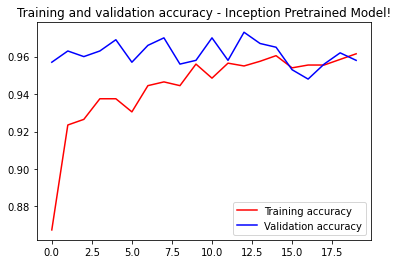

<Figure size 432x288 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - Inception Pretrained Model!')
plt.legend(loc=0)
plt.figure()


plt.show()